In [1]:
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import tensorflow.keras as K
from tensorflow.keras import models
from tensorflow.keras import layers
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# Boston Housingデータセットのダウンロード
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
# データセットのデータの確認
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'ACE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,ACE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [4]:
# データの正規化
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [5]:
# モデルの定義
def build_model():
    # 同じモデルを複数回インスタンスかする必要があるため，
    # モデルをインスタンス化するための関数を使用
    model = models.Sequential()
    model.add(layers.Dense(64, 
                           activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,
                           activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [6]:
# k分割交差検証
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    
    # 検証データの準備: フォールドiのデータ
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # 訓練データの準備: 残りのフォールドのデータ
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # Kerasモデルを構築(コンパイル済み)
    model = build_model()
    
    # モデルをサイレントモード（verbose=0）で適合
    model.fit(partial_train_data, partial_train_targets,
             epochs=num_epochs, batch_size=1)
    
    # モデルを検証データで評価
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
Train on 303 samples
Epoch 1/100
303/303 [==============================] - 3s 9ms/sample - loss: 229.3374 - mae: 11.8247
Epoch 2/100
303/303 [==============================] - 1s 3ms/sample - loss: 30.0752 - mae: 3.8432
Epoch 3/100
303/303 [==============================] - 1s 3ms/sample - loss: 23.2763 - mae: 3.3126
Epoch 4/100
303/303 [==============================] - 1s 3ms/sample - loss: 18.6245 - mae: 3.0066
Epoch 5/100
303/303 [==============================] - 1s 3ms/sample - loss: 17.2245 - mae: 2.8333
Epoch 6/100
303/303 [==============================] - 1s 3ms/sample - loss: 15.5193 - mae: 2.6623
Epoch 7/100
303/303 [==============================] - 1s 3ms/sample - loss: 15.1413 - mae: 2.5732
Epoch 8/100
303/303 [==============================] - 1s 3ms/sample - loss: 13.7203 - mae: 2.5150
Epoch 9/100
303/303 [==============================] - 1s 3ms/sample - loss: 13.6446 - mae: 2.4218
Epoch 10/100
303/303 [==============================] - 1s 3ms/sam

303/303 [==============================] - 1s 3ms/sample - loss: 5.1795 - mae: 1.4570
Epoch 84/100
303/303 [==============================] - 1s 3ms/sample - loss: 5.0137 - mae: 1.4578
Epoch 85/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.7926 - mae: 1.4384
Epoch 86/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.5183 - mae: 1.4550
Epoch 87/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.8272 - mae: 1.4422
Epoch 88/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.4297 - mae: 1.3494
Epoch 89/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.7722 - mae: 1.4310
Epoch 90/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.5856 - mae: 1.4330
Epoch 91/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.3111 - mae: 1.3894
Epoch 92/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.2342 - mae: 1.3751
Epoch 93/100
303/303 [=

303/303 [==============================] - 1s 3ms/sample - loss: 5.6993 - mae: 1.6189
Epoch 66/100
303/303 [==============================] - 1s 3ms/sample - loss: 5.5070 - mae: 1.4751
Epoch 67/100
303/303 [==============================] - 1s 3ms/sample - loss: 5.4660 - mae: 1.4832
Epoch 68/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.9182 - mae: 1.5414
Epoch 69/100
303/303 [==============================] - 1s 3ms/sample - loss: 5.7310 - mae: 1.5185
Epoch 70/100
303/303 [==============================] - 1s 3ms/sample - loss: 5.4554 - mae: 1.5118
Epoch 71/100
303/303 [==============================] - 1s 3ms/sample - loss: 5.5417 - mae: 1.4978
Epoch 72/100
303/303 [==============================] - 1s 3ms/sample - loss: 5.1982 - mae: 1.4995
Epoch 73/100
303/303 [==============================] - 1s 3ms/sample - loss: 5.4096 - mae: 1.4501
Epoch 74/100
303/303 [==============================] - 1s 3ms/sample - loss: 5.3645 - mae: 1.4363
Epoch 75/100
303/303 [=

303/303 [==============================] - 1s 3ms/sample - loss: 4.9538 - mae: 1.6220
Epoch 48/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.7292 - mae: 1.5303
Epoch 49/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.5300 - mae: 1.5651
Epoch 50/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.5792 - mae: 1.5116
Epoch 51/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.4725 - mae: 1.5027
Epoch 52/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.3281 - mae: 1.5246
Epoch 53/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.6306 - mae: 1.4915
Epoch 54/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.4802 - mae: 1.5231
Epoch 55/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.1620 - mae: 1.4520
Epoch 56/100
303/303 [==============================] - 1s 3ms/sample - loss: 4.2118 - mae: 1.5025
Epoch 57/100
303/303 [=

303/303 [==============================] - 1s 3ms/sample - loss: 7.6399 - mae: 1.7519
Epoch 30/100
303/303 [==============================] - 1s 3ms/sample - loss: 7.1544 - mae: 1.7866
Epoch 31/100
303/303 [==============================] - 1s 3ms/sample - loss: 6.9845 - mae: 1.7274
Epoch 32/100
303/303 [==============================] - 1s 3ms/sample - loss: 7.1136 - mae: 1.7024
Epoch 33/100
303/303 [==============================] - 1s 3ms/sample - loss: 6.5481 - mae: 1.6903
Epoch 34/100
303/303 [==============================] - 1s 3ms/sample - loss: 6.9717 - mae: 1.7334
Epoch 35/100
303/303 [==============================] - 1s 3ms/sample - loss: 6.9517 - mae: 1.7487
Epoch 36/100
303/303 [==============================] - 1s 3ms/sample - loss: 6.4899 - mae: 1.6896
Epoch 37/100
303/303 [==============================] - 1s 3ms/sample - loss: 6.4912 - mae: 1.6620
Epoch 38/100
303/303 [==============================] - 1s 3ms/sample - loss: 6.5521 - mae: 1.6329
Epoch 39/100
303/303 [=

In [7]:
# 結果を確認
all_scores

[2.4856298, 2.6586313, 2.6390946, 2.4644632]

In [8]:
# 結果の平均を確認
np.mean(all_scores)

2.5619547

In [9]:
# フォールドごとに検証ログを保存
# k分割交差検証
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    
    # 検証データの準備: フォールドiのデータ
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # 訓練データの準備: 残りのフォールドのデータ
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # Kerasモデルを構築(コンパイル済み)
    model = build_model()
    
    # モデルをサイレントモード（verbose=0）で適合
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, 
                        batch_size=1)
    # モデルを検証データで評価
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 2s 8ms/sample - loss: 232.8007 - mae: 11.5369 - val_loss: 38.3344 - val_mae: 4.2100
Epoch 2/500
303/303 [==============================] - 1s 4ms/sample - loss: 28.7952 - mae: 3.6332 - val_loss: 24.0393 - val_mae: 3.3939
Epoch 3/500
303/303 [==============================] - 1s 3ms/sample - loss: 20.0257 - mae: 2.9894 - val_loss: 15.8310 - val_mae: 2.7313
Epoch 4/500
303/303 [==============================] - 1s 3ms/sample - loss: 17.4964 - mae: 2.8227 - val_loss: 14.7405 - val_mae: 2.7595
Epoch 5/500
303/303 [==============================] - 1s 3ms/sample - loss: 15.8187 - mae: 2.7015 - val_loss: 15.6653 - val_mae: 2.5838
Epoch 6/500
303/303 [==============================] - 1s 3ms/sample - loss: 14.6798 - mae: 2.6470 - val_loss: 14.0532 - val_mae: 2.4106
Epoch 7/500
303/303 [==============================] - 1s 3ms/sample - loss: 13.8481 - mae: 2.4987 - val_loss:

303/303 [==============================] - 1s 4ms/sample - loss: 6.1856 - mae: 1.6529 - val_loss: 8.8811 - val_mae: 2.0673
Epoch 61/500
303/303 [==============================] - 1s 4ms/sample - loss: 6.2608 - mae: 1.6352 - val_loss: 8.4573 - val_mae: 2.0103
Epoch 62/500
303/303 [==============================] - 1s 4ms/sample - loss: 6.2285 - mae: 1.5788 - val_loss: 8.7451 - val_mae: 2.0733
Epoch 63/500
303/303 [==============================] - 1s 4ms/sample - loss: 6.1845 - mae: 1.6338 - val_loss: 10.2034 - val_mae: 2.4935
Epoch 64/500
303/303 [==============================] - 1s 5ms/sample - loss: 6.3514 - mae: 1.5807 - val_loss: 8.8439 - val_mae: 2.1050
Epoch 65/500
303/303 [==============================] - 1s 5ms/sample - loss: 6.0298 - mae: 1.5894 - val_loss: 10.1461 - val_mae: 2.4584
Epoch 66/500
303/303 [==============================] - 1s 5ms/sample - loss: 5.5324 - mae: 1.5716 - val_loss: 8.6916 - val_mae: 2.0613
Epoch 67/500
303/303 [==============================] - 1s 

303/303 [==============================] - 1s 5ms/sample - loss: 4.1921 - mae: 1.3569 - val_loss: 8.6568 - val_mae: 1.9890
Epoch 121/500
303/303 [==============================] - 1s 5ms/sample - loss: 4.0309 - mae: 1.4108 - val_loss: 9.0137 - val_mae: 2.0732
Epoch 122/500
303/303 [==============================] - 1s 4ms/sample - loss: 3.7327 - mae: 1.3535 - val_loss: 9.7641 - val_mae: 2.2229
Epoch 123/500
303/303 [==============================] - 1s 4ms/sample - loss: 4.0762 - mae: 1.4096 - val_loss: 8.9629 - val_mae: 2.1686
Epoch 124/500
303/303 [==============================] - 1s 4ms/sample - loss: 3.9005 - mae: 1.3620 - val_loss: 10.2528 - val_mae: 2.3609
Epoch 125/500
303/303 [==============================] - 1s 4ms/sample - loss: 4.1760 - mae: 1.4243 - val_loss: 9.1610 - val_mae: 2.2296
Epoch 126/500
303/303 [==============================] - 1s 4ms/sample - loss: 3.6939 - mae: 1.3147 - val_loss: 10.8835 - val_mae: 2.2869
Epoch 127/500
303/303 [==============================

303/303 [==============================] - 1s 3ms/sample - loss: 2.8610 - mae: 1.1881 - val_loss: 8.9197 - val_mae: 2.0223
Epoch 180/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.6243 - mae: 1.1648 - val_loss: 9.2315 - val_mae: 2.2042
Epoch 181/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.9042 - mae: 1.1913 - val_loss: 10.0101 - val_mae: 2.2041
Epoch 182/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.6560 - mae: 1.1502 - val_loss: 10.3205 - val_mae: 2.2009
Epoch 183/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.7854 - mae: 1.2033 - val_loss: 9.5509 - val_mae: 2.1076
Epoch 184/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.6788 - mae: 1.1772 - val_loss: 8.9362 - val_mae: 2.1399
Epoch 185/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.0483 - mae: 1.2028 - val_loss: 11.3648 - val_mae: 2.4186
Epoch 186/500
303/303 [=============================

303/303 [==============================] - 1s 3ms/sample - loss: 2.1937 - mae: 1.0420 - val_loss: 8.8823 - val_mae: 2.0765
Epoch 239/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.1725 - mae: 1.0148 - val_loss: 10.7181 - val_mae: 2.2335
Epoch 240/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.0753 - mae: 1.0678 - val_loss: 10.9175 - val_mae: 2.3681
Epoch 241/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.1705 - mae: 1.0737 - val_loss: 9.5014 - val_mae: 2.1907
Epoch 242/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.0510 - mae: 1.0623 - val_loss: 11.0058 - val_mae: 2.3027
Epoch 243/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.0136 - mae: 1.0629 - val_loss: 9.4675 - val_mae: 2.2071
Epoch 244/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.8377 - mae: 1.0115 - val_loss: 10.9440 - val_mae: 2.3135
Epoch 245/500
303/303 [============================

303/303 [==============================] - 1s 3ms/sample - loss: 1.7288 - mae: 0.9767 - val_loss: 10.3068 - val_mae: 2.1881
Epoch 298/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4874 - mae: 0.9013 - val_loss: 10.3230 - val_mae: 2.2113
Epoch 299/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5280 - mae: 0.8916 - val_loss: 11.1181 - val_mae: 2.4126
Epoch 300/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4931 - mae: 0.9524 - val_loss: 13.1928 - val_mae: 2.5475
Epoch 301/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.7689 - mae: 0.9898 - val_loss: 11.2883 - val_mae: 2.3832
Epoch 302/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4774 - mae: 0.8987 - val_loss: 9.8900 - val_mae: 2.2230
Epoch 303/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5196 - mae: 0.9571 - val_loss: 10.2291 - val_mae: 2.2138
Epoch 304/500
303/303 [==========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.2485 - mae: 0.8455 - val_loss: 12.1379 - val_mae: 2.4292
Epoch 357/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.3240 - mae: 0.8145 - val_loss: 10.4180 - val_mae: 2.2954
Epoch 358/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.3028 - mae: 0.8172 - val_loss: 11.2009 - val_mae: 2.4088
Epoch 359/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.2512 - mae: 0.8197 - val_loss: 10.7321 - val_mae: 2.4025
Epoch 360/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4110 - mae: 0.8893 - val_loss: 10.4504 - val_mae: 2.3201
Epoch 361/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1302 - mae: 0.7803 - val_loss: 12.4965 - val_mae: 2.4995
Epoch 362/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1605 - mae: 0.8174 - val_loss: 12.2895 - val_mae: 2.4636
Epoch 363/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.1509 - mae: 0.8014 - val_loss: 11.7294 - val_mae: 2.4823
Epoch 416/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1098 - mae: 0.8087 - val_loss: 11.2333 - val_mae: 2.3498
Epoch 417/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0442 - mae: 0.7165 - val_loss: 11.3859 - val_mae: 2.4245
Epoch 418/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1021 - mae: 0.7802 - val_loss: 11.3985 - val_mae: 2.3747
Epoch 419/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0723 - mae: 0.7801 - val_loss: 11.4413 - val_mae: 2.4988
Epoch 420/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1061 - mae: 0.7450 - val_loss: 12.3696 - val_mae: 2.5558
Epoch 421/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0716 - mae: 0.7426 - val_loss: 12.7366 - val_mae: 2.5130
Epoch 422/500
303/303 [=========================

303/303 [==============================] - 1s 4ms/sample - loss: 0.9381 - mae: 0.7084 - val_loss: 11.2906 - val_mae: 2.4178
Epoch 475/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8754 - mae: 0.7137 - val_loss: 13.3356 - val_mae: 2.6566
Epoch 476/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0792 - mae: 0.7583 - val_loss: 11.5662 - val_mae: 2.4813
Epoch 477/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9861 - mae: 0.7565 - val_loss: 11.3504 - val_mae: 2.4369
Epoch 478/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9799 - mae: 0.7293 - val_loss: 10.8044 - val_mae: 2.3449
Epoch 479/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9174 - mae: 0.6921 - val_loss: 11.4991 - val_mae: 2.4428
Epoch 480/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8138 - mae: 0.6855 - val_loss: 12.1260 - val_mae: 2.3806
Epoch 481/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 7.6667 - mae: 1.8457 - val_loss: 9.5949 - val_mae: 2.3845
Epoch 34/500
303/303 [==============================] - 1s 3ms/sample - loss: 7.6432 - mae: 1.8224 - val_loss: 11.3384 - val_mae: 2.5921
Epoch 35/500
303/303 [==============================] - 1s 3ms/sample - loss: 7.1632 - mae: 1.7488 - val_loss: 14.0473 - val_mae: 2.9211
Epoch 36/500
303/303 [==============================] - 1s 3ms/sample - loss: 7.2325 - mae: 1.7908 - val_loss: 13.4123 - val_mae: 2.8310
Epoch 37/500
303/303 [==============================] - 1s 3ms/sample - loss: 7.1495 - mae: 1.7587 - val_loss: 11.7376 - val_mae: 2.7481
Epoch 38/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.9727 - mae: 1.7435 - val_loss: 9.9843 - val_mae: 2.4810
Epoch 39/500
303/303 [==============================] - 1s 3ms/sample - loss: 7.0766 - mae: 1.7623 - val_loss: 10.5030 - val_mae: 2.4830
Epoch 40/500
303/303 [==============================] - 

Epoch 93/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.1305 - mae: 1.3136 - val_loss: 12.5664 - val_mae: 2.5118
Epoch 94/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.4511 - mae: 1.3851 - val_loss: 12.6673 - val_mae: 2.5163
Epoch 95/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.8686 - mae: 1.3098 - val_loss: 11.7253 - val_mae: 2.5637
Epoch 96/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.0555 - mae: 1.3253 - val_loss: 11.2225 - val_mae: 2.5371
Epoch 97/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.7749 - mae: 1.2795 - val_loss: 12.1865 - val_mae: 2.5241
Epoch 98/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.7515 - mae: 1.2826 - val_loss: 11.3435 - val_mae: 2.3148
Epoch 99/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.1210 - mae: 1.3329 - val_loss: 12.1934 - val_mae: 2.5420
Epoch 100/500
303/303 [==================

303/303 [==============================] - 1s 3ms/sample - loss: 2.2588 - mae: 1.0709 - val_loss: 23.0116 - val_mae: 3.1717
Epoch 153/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.3734 - mae: 1.0705 - val_loss: 11.2034 - val_mae: 2.3951
Epoch 154/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.3773 - mae: 1.0217 - val_loss: 17.2873 - val_mae: 2.7896
Epoch 155/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.2245 - mae: 1.0705 - val_loss: 15.0656 - val_mae: 2.5704
Epoch 156/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.2967 - mae: 1.0328 - val_loss: 20.2764 - val_mae: 2.9641
Epoch 157/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.4104 - mae: 1.0676 - val_loss: 16.0637 - val_mae: 2.6321
Epoch 158/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.2630 - mae: 1.0345 - val_loss: 17.3897 - val_mae: 2.7207
Epoch 159/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.7150 - mae: 0.9683 - val_loss: 19.3189 - val_mae: 2.8408
Epoch 212/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5862 - mae: 0.9118 - val_loss: 14.0330 - val_mae: 2.5368
Epoch 213/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.6465 - mae: 0.9307 - val_loss: 13.5779 - val_mae: 2.5333
Epoch 214/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.5778 - mae: 0.9405 - val_loss: 22.6079 - val_mae: 2.9994
Epoch 215/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5402 - mae: 0.9132 - val_loss: 16.3480 - val_mae: 2.6602
Epoch 216/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5967 - mae: 0.8930 - val_loss: 16.3407 - val_mae: 2.7392
Epoch 217/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5556 - mae: 0.9306 - val_loss: 17.5694 - val_mae: 2.6489
Epoch 218/500
303/303 [=========================

303/303 [==============================] - 1s 4ms/sample - loss: 1.2501 - mae: 0.8163 - val_loss: 18.2251 - val_mae: 2.6690
Epoch 271/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.1487 - mae: 0.8042 - val_loss: 20.7224 - val_mae: 2.9373
Epoch 272/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.2573 - mae: 0.8097 - val_loss: 18.5857 - val_mae: 2.7610
Epoch 273/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.3012 - mae: 0.8187 - val_loss: 22.0441 - val_mae: 3.0156
Epoch 274/500
303/303 [==============================] - 2s 5ms/sample - loss: 1.1411 - mae: 0.7632 - val_loss: 20.2831 - val_mae: 2.9014
Epoch 275/500
303/303 [==============================] - 2s 5ms/sample - loss: 0.9522 - mae: 0.7445 - val_loss: 19.7669 - val_mae: 2.8673
Epoch 276/500
303/303 [==============================] - 1s 5ms/sample - loss: 1.3568 - mae: 0.8228 - val_loss: 18.2805 - val_mae: 2.7776
Epoch 277/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 0.8770 - mae: 0.6723 - val_loss: 26.0109 - val_mae: 3.0126
Epoch 330/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0801 - mae: 0.7590 - val_loss: 20.0993 - val_mae: 2.8189
Epoch 331/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9573 - mae: 0.7251 - val_loss: 17.1899 - val_mae: 2.7109
Epoch 332/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0841 - mae: 0.7446 - val_loss: 14.8179 - val_mae: 2.6115
Epoch 333/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9237 - mae: 0.6933 - val_loss: 22.4884 - val_mae: 2.9191
Epoch 334/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9459 - mae: 0.7273 - val_loss: 20.3807 - val_mae: 2.9329
Epoch 335/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9554 - mae: 0.7195 - val_loss: 18.0432 - val_mae: 2.7844
Epoch 336/500
303/303 [=========================

303/303 [==============================] - 1s 4ms/sample - loss: 0.7982 - mae: 0.6791 - val_loss: 23.2500 - val_mae: 2.7977
Epoch 389/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.9175 - mae: 0.7269 - val_loss: 19.0399 - val_mae: 2.8433
Epoch 390/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.7988 - mae: 0.6937 - val_loss: 25.9793 - val_mae: 2.8905
Epoch 391/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.9189 - mae: 0.6758 - val_loss: 20.6169 - val_mae: 2.7755
Epoch 392/500
303/303 [==============================] - 2s 5ms/sample - loss: 0.9631 - mae: 0.7181 - val_loss: 19.4294 - val_mae: 2.8696
Epoch 393/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.9305 - mae: 0.7292 - val_loss: 19.0804 - val_mae: 2.7277
Epoch 394/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8695 - mae: 0.6764 - val_loss: 19.0555 - val_mae: 2.6956
Epoch 395/500
303/303 [=========================

303/303 [==============================] - 1s 4ms/sample - loss: 0.7149 - mae: 0.6473 - val_loss: 20.3438 - val_mae: 2.7385
Epoch 448/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.7774 - mae: 0.6579 - val_loss: 26.4260 - val_mae: 2.9386
Epoch 449/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.7765 - mae: 0.6501 - val_loss: 24.8013 - val_mae: 2.9151
Epoch 450/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.7235 - mae: 0.6246 - val_loss: 24.0226 - val_mae: 2.9707
Epoch 451/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.8409 - mae: 0.6701 - val_loss: 18.7799 - val_mae: 2.6326
Epoch 452/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.6829 - mae: 0.6202 - val_loss: 23.0708 - val_mae: 2.8258
Epoch 453/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.6860 - mae: 0.6000 - val_loss: 18.5115 - val_mae: 2.7269
Epoch 454/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 13.3696 - mae: 2.5542 - val_loss: 15.2209 - val_mae: 2.5574
Epoch 7/500
303/303 [==============================] - 1s 3ms/sample - loss: 12.1999 - mae: 2.4021 - val_loss: 14.8558 - val_mae: 2.5084
Epoch 8/500
303/303 [==============================] - 1s 3ms/sample - loss: 11.0870 - mae: 2.3358 - val_loss: 14.9285 - val_mae: 2.4630
Epoch 9/500
303/303 [==============================] - 1s 3ms/sample - loss: 10.4865 - mae: 2.2590 - val_loss: 15.6848 - val_mae: 2.6184
Epoch 10/500
303/303 [==============================] - 1s 3ms/sample - loss: 9.9118 - mae: 2.1840 - val_loss: 13.4713 - val_mae: 2.4642
Epoch 11/500
303/303 [==============================] - 1s 3ms/sample - loss: 9.0542 - mae: 2.0951 - val_loss: 15.0462 - val_mae: 2.4384
Epoch 12/500
303/303 [==============================] - 1s 3ms/sample - loss: 8.5234 - mae: 2.0794 - val_loss: 14.5811 - val_mae: 2.6257
Epoch 13/500
303/303 [==============================]

Epoch 66/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.3085 - mae: 1.4187 - val_loss: 13.7649 - val_mae: 2.5891
Epoch 67/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.4380 - mae: 1.4178 - val_loss: 15.1352 - val_mae: 2.6860
Epoch 68/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.2732 - mae: 1.4150 - val_loss: 15.7091 - val_mae: 2.6219
Epoch 69/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.9000 - mae: 1.3709 - val_loss: 15.3521 - val_mae: 2.6481
Epoch 70/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.1883 - mae: 1.4570 - val_loss: 15.9727 - val_mae: 2.8085
Epoch 71/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.2258 - mae: 1.4284 - val_loss: 15.6748 - val_mae: 2.7147
Epoch 72/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.1777 - mae: 1.4097 - val_loss: 14.5339 - val_mae: 2.6620
Epoch 73/500
303/303 [===================

303/303 [==============================] - 1s 4ms/sample - loss: 2.3541 - mae: 1.1255 - val_loss: 15.3249 - val_mae: 2.6693
Epoch 126/500
303/303 [==============================] - 1s 4ms/sample - loss: 2.4133 - mae: 1.1174 - val_loss: 14.4230 - val_mae: 2.5013
Epoch 127/500
303/303 [==============================] - 1s 4ms/sample - loss: 2.3496 - mae: 1.0582 - val_loss: 14.1300 - val_mae: 2.5673
Epoch 128/500
303/303 [==============================] - 2s 5ms/sample - loss: 2.5436 - mae: 1.1509 - val_loss: 15.1924 - val_mae: 2.6283
Epoch 129/500
303/303 [==============================] - 1s 5ms/sample - loss: 2.3527 - mae: 1.1209 - val_loss: 15.1267 - val_mae: 2.6248
Epoch 130/500
303/303 [==============================] - 1s 4ms/sample - loss: 2.1464 - mae: 1.0698 - val_loss: 16.3190 - val_mae: 2.8114
Epoch 131/500
303/303 [==============================] - 1s 4ms/sample - loss: 2.1226 - mae: 1.0969 - val_loss: 15.3039 - val_mae: 2.6769
Epoch 132/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.5258 - mae: 0.8914 - val_loss: 16.0968 - val_mae: 2.6842
Epoch 185/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5204 - mae: 0.8808 - val_loss: 16.4153 - val_mae: 2.7538
Epoch 186/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.6255 - mae: 0.9700 - val_loss: 14.9589 - val_mae: 2.7703
Epoch 187/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.6231 - mae: 0.9833 - val_loss: 16.7665 - val_mae: 2.9078
Epoch 188/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.5733 - mae: 0.9049 - val_loss: 16.4301 - val_mae: 2.8110
Epoch 189/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.6113 - mae: 0.9441 - val_loss: 15.6376 - val_mae: 2.8061
Epoch 190/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.4400 - mae: 0.9097 - val_loss: 15.6749 - val_mae: 2.6685
Epoch 191/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.3078 - mae: 0.8251 - val_loss: 15.3380 - val_mae: 2.7076
Epoch 244/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1584 - mae: 0.7974 - val_loss: 16.9721 - val_mae: 2.9365
Epoch 245/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1386 - mae: 0.7688 - val_loss: 15.2438 - val_mae: 2.6902
Epoch 246/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1670 - mae: 0.8132 - val_loss: 15.9855 - val_mae: 2.7945
Epoch 247/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1240 - mae: 0.7977 - val_loss: 15.1019 - val_mae: 2.6964
Epoch 248/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1541 - mae: 0.7947 - val_loss: 16.1283 - val_mae: 2.8203
Epoch 249/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1757 - mae: 0.8044 - val_loss: 15.8407 - val_mae: 2.7493
Epoch 250/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 0.9789 - mae: 0.7139 - val_loss: 14.9898 - val_mae: 2.6763
Epoch 303/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.1045 - mae: 0.7471 - val_loss: 16.6395 - val_mae: 2.8584
Epoch 304/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0292 - mae: 0.7469 - val_loss: 17.1030 - val_mae: 2.8072
Epoch 305/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9961 - mae: 0.7340 - val_loss: 15.3795 - val_mae: 2.6630
Epoch 306/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0258 - mae: 0.7564 - val_loss: 14.4298 - val_mae: 2.5603
Epoch 307/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9493 - mae: 0.6833 - val_loss: 15.1816 - val_mae: 2.7302
Epoch 308/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.9068 - mae: 0.7193 - val_loss: 15.6969 - val_mae: 2.7553
Epoch 309/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 0.8654 - mae: 0.6832 - val_loss: 15.0862 - val_mae: 2.6612
Epoch 362/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9410 - mae: 0.6873 - val_loss: 14.9799 - val_mae: 2.6420
Epoch 363/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.9054 - mae: 0.7044 - val_loss: 15.0321 - val_mae: 2.7133
Epoch 364/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.9823 - mae: 0.7166 - val_loss: 17.7435 - val_mae: 2.8077
Epoch 365/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8966 - mae: 0.6847 - val_loss: 14.6372 - val_mae: 2.6551
Epoch 366/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.0083 - mae: 0.6916 - val_loss: 14.6095 - val_mae: 2.6303
Epoch 367/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8499 - mae: 0.6765 - val_loss: 16.3386 - val_mae: 2.7585
Epoch 368/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 0.8690 - mae: 0.6621 - val_loss: 16.4436 - val_mae: 2.8350
Epoch 421/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8341 - mae: 0.6681 - val_loss: 15.3996 - val_mae: 2.6131
Epoch 422/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8918 - mae: 0.6613 - val_loss: 14.5811 - val_mae: 2.6611
Epoch 423/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8427 - mae: 0.6408 - val_loss: 14.4687 - val_mae: 2.6692
Epoch 424/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.7505 - mae: 0.6507 - val_loss: 15.0760 - val_mae: 2.6626
Epoch 425/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.7366 - mae: 0.6350 - val_loss: 14.9702 - val_mae: 2.6034
Epoch 426/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8699 - mae: 0.6625 - val_loss: 15.4019 - val_mae: 2.6375
Epoch 427/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 0.7189 - mae: 0.6250 - val_loss: 16.3486 - val_mae: 2.6713
Epoch 480/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.7156 - mae: 0.6158 - val_loss: 16.2879 - val_mae: 2.7329
Epoch 481/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8712 - mae: 0.6362 - val_loss: 16.1837 - val_mae: 2.6785
Epoch 482/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.6899 - mae: 0.6099 - val_loss: 16.0998 - val_mae: 2.6167
Epoch 483/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.7320 - mae: 0.6305 - val_loss: 17.0020 - val_mae: 2.8015
Epoch 484/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.6538 - mae: 0.5981 - val_loss: 16.0283 - val_mae: 2.7365
Epoch 485/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.7503 - mae: 0.6329 - val_loss: 16.7304 - val_mae: 2.8338
Epoch 486/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 6.9872 - mae: 1.7220 - val_loss: 11.7819 - val_mae: 2.3570
Epoch 39/500
303/303 [==============================] - 1s 3ms/sample - loss: 7.0127 - mae: 1.7735 - val_loss: 13.2930 - val_mae: 2.5357
Epoch 40/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.8176 - mae: 1.7373 - val_loss: 12.2982 - val_mae: 2.3897
Epoch 41/500
303/303 [==============================] - 1s 3ms/sample - loss: 6.8040 - mae: 1.7058 - val_loss: 13.5853 - val_mae: 2.5648
Epoch 42/500
303/303 [==============================] - 1s 4ms/sample - loss: 6.6127 - mae: 1.7047 - val_loss: 12.3254 - val_mae: 2.5368
Epoch 43/500
303/303 [==============================] - 1s 4ms/sample - loss: 6.6905 - mae: 1.7047 - val_loss: 11.6429 - val_mae: 2.2845
Epoch 44/500
303/303 [==============================] - 1s 4ms/sample - loss: 6.4914 - mae: 1.7119 - val_loss: 13.5178 - val_mae: 2.5344
Epoch 45/500
303/303 [==============================] 

Epoch 98/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.0847 - mae: 1.3176 - val_loss: 11.0517 - val_mae: 2.3520
Epoch 99/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.1805 - mae: 1.3572 - val_loss: 11.2538 - val_mae: 2.3495
Epoch 100/500
303/303 [==============================] - 1s 3ms/sample - loss: 4.2861 - mae: 1.2974 - val_loss: 11.9842 - val_mae: 2.4608
Epoch 101/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.8857 - mae: 1.2434 - val_loss: 11.4531 - val_mae: 2.4960
Epoch 102/500
303/303 [==============================] - 1s 4ms/sample - loss: 3.7702 - mae: 1.2914 - val_loss: 11.1809 - val_mae: 2.3204
Epoch 103/500
303/303 [==============================] - 1s 5ms/sample - loss: 3.8352 - mae: 1.2211 - val_loss: 10.2697 - val_mae: 2.2197
Epoch 104/500
303/303 [==============================] - 1s 5ms/sample - loss: 3.8813 - mae: 1.2515 - val_loss: 11.1163 - val_mae: 2.2637
Epoch 105/500
303/303 [=============

303/303 [==============================] - 1s 3ms/sample - loss: 2.8915 - mae: 1.1432 - val_loss: 12.3767 - val_mae: 2.5842
Epoch 158/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.0577 - mae: 1.0979 - val_loss: 12.2727 - val_mae: 2.5410
Epoch 159/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.8254 - mae: 1.1131 - val_loss: 11.5950 - val_mae: 2.5387
Epoch 160/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.9988 - mae: 1.1230 - val_loss: 11.1382 - val_mae: 2.3971
Epoch 161/500
303/303 [==============================] - 1s 3ms/sample - loss: 3.1626 - mae: 1.1376 - val_loss: 12.7581 - val_mae: 2.5554
Epoch 162/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.7592 - mae: 1.0937 - val_loss: 12.1984 - val_mae: 2.5443
Epoch 163/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.9118 - mae: 1.1680 - val_loss: 12.9828 - val_mae: 2.5719
Epoch 164/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 2.1316 - mae: 1.0550 - val_loss: 14.8225 - val_mae: 2.8676
Epoch 217/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.9978 - mae: 0.9899 - val_loss: 15.0040 - val_mae: 2.7695
Epoch 218/500
303/303 [==============================] - 1s 3ms/sample - loss: 1.9784 - mae: 0.9853 - val_loss: 12.2879 - val_mae: 2.4182
Epoch 219/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.0900 - mae: 1.0261 - val_loss: 13.2649 - val_mae: 2.6147
Epoch 220/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.0566 - mae: 0.9983 - val_loss: 14.8109 - val_mae: 2.6807
Epoch 221/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.0338 - mae: 0.9752 - val_loss: 15.5193 - val_mae: 2.8287
Epoch 222/500
303/303 [==============================] - 1s 3ms/sample - loss: 2.2222 - mae: 1.0354 - val_loss: 13.4470 - val_mae: 2.5503
Epoch 223/500
303/303 [=========================

303/303 [==============================] - 1s 4ms/sample - loss: 1.5142 - mae: 0.8595 - val_loss: 14.8162 - val_mae: 2.6362
Epoch 276/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.5277 - mae: 0.8634 - val_loss: 14.6120 - val_mae: 2.6890
Epoch 277/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.4761 - mae: 0.8619 - val_loss: 14.5355 - val_mae: 2.7603
Epoch 278/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.3663 - mae: 0.8091 - val_loss: 14.5411 - val_mae: 2.7128
Epoch 279/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.5975 - mae: 0.9111 - val_loss: 13.7317 - val_mae: 2.6558
Epoch 280/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.3647 - mae: 0.8307 - val_loss: 15.3319 - val_mae: 2.9239
Epoch 281/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.3847 - mae: 0.8259 - val_loss: 14.0636 - val_mae: 2.6775
Epoch 282/500
303/303 [=========================

303/303 [==============================] - 1s 4ms/sample - loss: 1.2419 - mae: 0.8235 - val_loss: 13.9539 - val_mae: 2.7174
Epoch 335/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.1694 - mae: 0.7710 - val_loss: 13.9075 - val_mae: 2.5719
Epoch 336/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.2629 - mae: 0.8499 - val_loss: 13.5093 - val_mae: 2.5612
Epoch 337/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.3857 - mae: 0.8216 - val_loss: 13.6941 - val_mae: 2.5782
Epoch 338/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.3178 - mae: 0.8252 - val_loss: 12.8350 - val_mae: 2.5654
Epoch 339/500
303/303 [==============================] - 2s 5ms/sample - loss: 1.1629 - mae: 0.7903 - val_loss: 13.5030 - val_mae: 2.5804
Epoch 340/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.1584 - mae: 0.7743 - val_loss: 13.1969 - val_mae: 2.4947
Epoch 341/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 1.0355 - mae: 0.7528 - val_loss: 15.5226 - val_mae: 2.7444
Epoch 394/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.0159 - mae: 0.7182 - val_loss: 16.2944 - val_mae: 2.8606
Epoch 395/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.9948 - mae: 0.7344 - val_loss: 14.7370 - val_mae: 2.6291
Epoch 396/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.9762 - mae: 0.7268 - val_loss: 16.4517 - val_mae: 2.8352
Epoch 397/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.9571 - mae: 0.7010 - val_loss: 14.9569 - val_mae: 2.7720
Epoch 398/500
303/303 [==============================] - 1s 5ms/sample - loss: 1.0885 - mae: 0.7707 - val_loss: 15.1837 - val_mae: 2.6731
Epoch 399/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.0146 - mae: 0.7326 - val_loss: 15.8560 - val_mae: 2.7746
Epoch 400/500
303/303 [=========================

303/303 [==============================] - 1s 3ms/sample - loss: 0.9162 - mae: 0.6847 - val_loss: 16.9827 - val_mae: 2.9438
Epoch 453/500
303/303 [==============================] - 1s 3ms/sample - loss: 0.8971 - mae: 0.6967 - val_loss: 16.1674 - val_mae: 2.7238
Epoch 454/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.8847 - mae: 0.6922 - val_loss: 17.4869 - val_mae: 2.7640
Epoch 455/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.9088 - mae: 0.7056 - val_loss: 16.5106 - val_mae: 2.7355
Epoch 456/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.9096 - mae: 0.6755 - val_loss: 15.5635 - val_mae: 2.7369
Epoch 457/500
303/303 [==============================] - 1s 4ms/sample - loss: 1.0086 - mae: 0.7090 - val_loss: 16.6690 - val_mae: 2.8734
Epoch 458/500
303/303 [==============================] - 1s 4ms/sample - loss: 0.7542 - mae: 0.6393 - val_loss: 18.8550 - val_mae: 2.8747
Epoch 459/500
303/303 [=========================

In [10]:
# k分割交差検証の平均スコアの履歴を構築
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

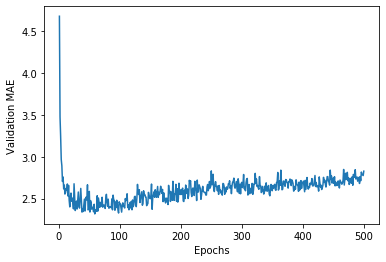

In [11]:
# 検証スコアのプロット
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

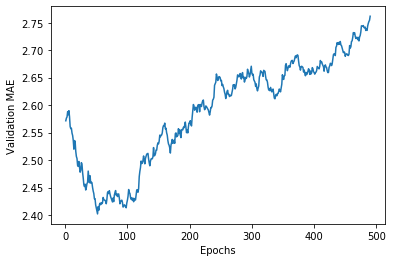

In [12]:
# 最初の１０個のデータ点を除外した検証スコアのプロット
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [13]:
# 最終的なモデルの訓練
model = build_model()

# 全データを使って訓練
model.fit(train_data, train_targets,
         epochs=80, batch_size=16)

# テストデータでの検証スコアを取得
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Train on 404 samples
Epoch 1/80
404/404 [==============================] - 2s 5ms/sample - loss: 494.0579 - mae: 20.1032
Epoch 2/80
404/404 [==============================] - 0s 245us/sample - loss: 316.7119 - mae: 15.4100
Epoch 3/80
404/404 [==============================] - 0s 218us/sample - loss: 153.0559 - mae: 10.1169
Epoch 4/80
404/404 [==============================] - 0s 210us/sample - loss: 64.6227 - mae: 6.2284
Epoch 5/80
404/404 [==============================] - 0s 209us/sample - loss: 37.0569 - mae: 4.5755
Epoch 6/80
404/404 [==============================] - 0s 227us/sample - loss: 25.7957 - mae: 3.6573
Epoch 7/80
404/404 [==============================] - 0s 333us/sample - loss: 21.1950 - mae: 3.2698
Epoch 8/80
404/404 [==============================] - 0s 319us/sample - loss: 18.2917 - mae: 3.0258
Epoch 9/80
404/404 [==============================] - 0s 295us/sample - loss: 16.7187 - mae: 2.8241
Epoch 10/80
404/404 [==============================] - 0s 302us/sample - lo

In [14]:
# 最終的なスコアを確認
test_mae_score

2.7307634